<a href="https://colab.research.google.com/github/seher13/PartialLeastSquares/blob/main/PLS_NIR_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLS NIR analysis

## Example from https://nirpyresearch.com/partial-least-squares-regression-python/

### Objection: Predict brix value of fresh peach from NIR spectra measurements. 

We have 50 NIR spectra of fresh peaches. Each spectrum is taken over 600 wavelenght points from 1100 nm to 2300 nm in steps of 2 nm.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [55]:
pls = PLSRegression(n_components=5, scale=True)

In [56]:
from sys import stdout
from scipy.signal import savgol_filter

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/peach_spectra_brix.csv')
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,wl21,wl22,wl23,wl24,wl25,wl26,wl27,wl28,wl29,wl30,wl31,wl32,wl33,wl34,wl35,wl36,wl37,wl38,wl39,...,wl561,wl562,wl563,wl564,wl565,wl566,wl567,wl568,wl569,wl570,wl571,wl572,wl573,wl574,wl575,wl576,wl577,wl578,wl579,wl580,wl581,wl582,wl583,wl584,wl585,wl586,wl587,wl588,wl589,wl590,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.

In [58]:
data.shape

(50, 601)

In [59]:
y = data['Brix'].values

In [60]:
y

array([15.5, 16.7, 18.1, 14.8, 15.1, 19.3, 12.5, 17.7, 18.5, 18.3, 18.6,
       17.2, 19.4, 16.2, 15.3, 14.3, 13.3, 14.8, 18.5, 11.2, 16.3, 17.5,
       16.4, 18.1, 17.5, 16.7, 20. , 14.5, 13. , 11.3, 16.8, 17.2, 15.4,
       13.5, 19.2, 15.4, 15.8, 18. , 18.2, 12.3, 15.5, 14.8, 19.1, 17.9,
       16.8, 18.1, 16.6, 18.8, 17.7, 18.1])

In [61]:
X = data.drop(['Brix'], axis=1).values

In [62]:
wl = np.arange(1100, 2300, 2)

In [63]:
wl

array([1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120,
       1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164,
       1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186,
       1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208,
       1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298, 1300, 1302, 1304, 1306, 1308, 1310, 1312, 1314, 1316, 1318,
       1320, 1322, 1324, 1326, 1328, 1330, 1332, 1334, 1336, 1338, 1340,
       1342, 1344, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1360, 1362,
       1364, 1366, 1368, 1370, 1372, 1374, 1376, 1378, 1380, 1382, 1384,
       1386, 1388, 1390, 1392, 1394, 1396, 1398, 14

In [64]:
df = pd.DataFrame(wl)

In [65]:
df.loc[-1] = ['Brix']
df.index = df.index +1
df= df.sort_index()

In [66]:
df

,0
0,Brix
1,1100
2,1102
3,1104
4,1106
...,...
596,2290
597,2292
598,2294
599,2296


In [67]:
column_names = df.values

In [68]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,wl21,wl22,wl23,wl24,wl25,wl26,wl27,wl28,wl29,wl30,wl31,wl32,wl33,wl34,wl35,wl36,wl37,wl38,wl39,...,wl561,wl562,wl563,wl564,wl565,wl566,wl567,wl568,wl569,wl570,wl571,wl572,wl573,wl574,wl575,wl576,wl577,wl578,wl579,wl580,wl581,wl582,wl583,wl584,wl585,wl586,wl587,wl588,wl589,wl590,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.

First, lets draw NIR spectra for each NIR measurement

In [69]:
wl

array([1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120,
       1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164,
       1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186,
       1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208,
       1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298, 1300, 1302, 1304, 1306, 1308, 1310, 1312, 1314, 1316, 1318,
       1320, 1322, 1324, 1326, 1328, 1330, 1332, 1334, 1336, 1338, 1340,
       1342, 1344, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1360, 1362,
       1364, 1366, 1368, 1370, 1372, 1374, 1376, 1378, 1380, 1382, 1384,
       1386, 1388, 1390, 1392, 1394, 1396, 1398, 14

In [70]:
X2 = pd.DataFrame(X)

In [71]:
X2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,-0.860228,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,-0.908364,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,-0.942279,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,-0.895532,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,-0.887882,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.653425,0.657747,0.662194,0.666733,0.671445,0.676275,0.681196,0.686236,0.691331,0.696367,0.701249,0.705785,0.709909,0.713456,0.716335,0.7

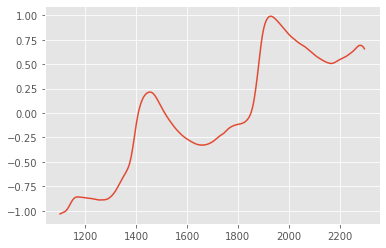

In [72]:
fig = plt.figure()
ax = plt.axes()

ax.plot(wl, X2.iloc[0,:])

In [73]:
data.columns

Index(['Brix', 'wl1', 'wl2', 'wl3', 'wl4', 'wl5', 'wl6', 'wl7', 'wl8', 'wl9',
       ...
       'wl591', 'wl592', 'wl593', 'wl594', 'wl595', 'wl596', 'wl597', 'wl598',
       'wl599', 'wl600'],
      dtype='object', length=601)

In [74]:
column_names = column_names.flatten()

In [75]:
data.columns = column_names

In [76]:
data.head()

,Brix,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,...,2220,2222,2224,2226,2228,2230,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250,2252,2254,2256,2258,2260,2262,2264,2266,2268,2270,2272,2274,2276,2278,2280,2282,2284,2286,2288,2290,2292,2294,2296,2298
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.653425,0.657747,0.662194,0.6667

In [77]:
data

,Brix,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,...,2220,2222,2224,2226,2228,2230,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250,2252,2254,2256,2258,2260,2262,2264,2266,2268,2270,2272,2274,2276,2278,2280,2282,2284,2286,2288,2290,2292,2294,2296,2298
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.653425,0.657747,0.662194,0.6667

In [78]:
data_trans = data.transpose()

In [79]:
data_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Brix,15.500000,16.700000,18.100000,14.800000,15.100000,19.300000,12.500000,17.700000,18.500000,18.300000,18.600000,17.200000,19.400000,16.200000,15.300000,14.300000,13.300000,14.800000,18.500000,11.200000,16.300000,17.500000,16.400000,18.100000,17.500000,16.700000,20.000000,14.500000,13.000000,11.300000,16.800000,17.200000,15.400000,13.500000,19.200000,15.400000,15.800000,18.000000,18.200000,12.300000,15.500000,14.800000,19.100000,17.900000,16.800000,18.100000,16.600000,18.800000,17.700000,18.100000
1100,-1.032355,-1.139034,-1.152821,-1.087215,-1.080364,-0.981329,-1.116596,-1.161027,-1.167002,-1.135624,-1.037029,-0.932467,-1.058743,-1.015973,-1.114346,-1.126309,-1.214996,-1.031265,-0.973741,-1.069199,-1.064018,-1.070859,-1.003094,-0.996235,-0.994628,-0.991444,-0.963085,-0.978270,-0.954397,-0.833572,-1.004240,-0.972120,-0.997730,-0.991166,-0.863299,-0.891666,-1.075860,-1.117406,-1.009840,-1.073756,-1.016599,-1.169151,-1.142776,-1.047168,-1.132140,-1.133235,-1.074949,-1.075072,-1.135471,-1.036062
1102,-1.030551,-1.137186,-1.150937,-1.085455,-1.078436,-0.979609,-1.114783,-1.159104,-1.165128,-1.133766,-1.035263,-0.930752,-1.056923,-1.014087,-1.112413,-1.124433,-1.213145,-1.029444,-0.971831,-1.067305,-1.062103,-1.069032,-1.001246,-0.994376,-0.992769,-0.989577,-0.961279,-0.976371,-0.952596,-0.831776,-1.002456,-0.970256,-0.995873,-0.989340,-0.861532,-0.889867,-1.073923,-1.115602,-1.008042,-1.071898,-1.014749,-1.167316,-1.140995,-1.045390,-1.130190,-1.131388,-1.073077,-1.073220,-1.133636,-1.034260
1104,-1.027970,-1.134485,-1.148288,-1.082867,-1.075784,-0.977085,-1.112159,-1.156357,-1.162439,-1.131093,-1.032739,-0.928294,-1.054333,-1.011490,-1.109615,-1.121790,-1.210363,-1.026830,-0.969083,-1.064578,-1.059360,-1.066469,-0.998600,-0.991728,-0.990117,-0.986945,-0.958734,-0.973747,-0.949968,-0.829267,-0.999976,-0.967536,-0.993279,-0.986710,-0.859047,-0.887298,-1.071172,-1.113034,-1.005537,-1.069220,-1.012057,-1.164623,-1.138415,-1.042812,-1.127475,-1.128708,-1.070434,-1.070531,-1.131002,-1.031678
1106,-1.024937,-1.131222,-1.145165,-1.079797,-1.072693,-0.974006,-1.108967,-1.153022,-1.159234,-1.127927,-1.029744,-0.925379,-1.051283,-1.008474,-1.106212,-1.118624,-1.206912,-1.023717,-0.965724,-1.061270,-1.056005,-1.063489,-0.995521,-0.988599,-0.986991,-0.983845,-0.955717,-0.970635,-0.946798,-0.826347,-0.997076,-0.964252,-0.990266,-0.983572,-0.856145,-0.884286,-1.067877,-1.109951,-1.002623,-1.066053,-1.008933,-1.161388,-1.135291,-1.039722,-1.124280,-1.125488,-1.067305,-1.067333,-1.127933,-1.028609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,0.684294,0.710405,0.717415,0.742886,0.704232,0.683037,0.698013,0.709406,0.723164,0.706479,0.698866,0.676718,0.706208,0.719505,0.704270,0.706605,0.723160,0.714793,0.671482,0.714089,0.697320,0.707340,0.693294,0.689684,0.697344,0.690753,0.688795,0.685719,0.669437,0.649538,0.731076,0.669804,0.699380,0.691395,0.673780,0.660988,0.675457,0.715732,0.715786,0.701809,0.686561,0.773737,0.727635,0.677888,0.709077,0.729688,0.692695,0.702870,0.722074,0.682452
2292,0.679348,0.702706,0.709645,0.736085,0.697717,0.676574,0.691105,0.701723,0.715477,0.699453,0.693753,0.671350,0.700296,0.713695,0.695746,0.698599,0.713609,0.707306,0.665890,0.706369,0.690276,0.700345,0.686818,0.683380,0.691421,0.684479,0.683317,0.679971,0.664321,0.645104,0.724326,0.664191,0.693837,0.685602,0.669314,0.656738,0.668703,0.708863,0.709574,0.695142,0.679962,0.765342,0.720245,0.671955,0.702017,0.722603,0.685385,0.696847,0.715366,0.676434
2294,0.673240,0.693710,0.700555,0.728019,0.689882,0.669187,0.682972,0.692694,0.706339,0.691065,0.687409,0.664925,0.693080,0.706819,0.686072,0.689218,0.702624,0.698597,0.659325,0.697367,0.682064,0.692018,0.679236,0.675989

In [80]:
data_trans_wl = data_trans.iloc[1:,:]

In [81]:
data_trans_wl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1100,-1.032355,-1.139034,-1.152821,-1.087215,-1.080364,-0.981329,-1.116596,-1.161027,-1.167002,-1.135624,-1.037029,-0.932467,-1.058743,-1.015973,-1.114346,-1.126309,-1.214996,-1.031265,-0.973741,-1.069199,-1.064018,-1.070859,-1.003094,-0.996235,-0.994628,-0.991444,-0.963085,-0.978270,-0.954397,-0.833572,-1.004240,-0.972120,-0.997730,-0.991166,-0.863299,-0.891666,-1.075860,-1.117406,-1.009840,-1.073756,-1.016599,-1.169151,-1.142776,-1.047168,-1.132140,-1.133235,-1.074949,-1.075072,-1.135471,-1.036062
1102,-1.030551,-1.137186,-1.150937,-1.085455,-1.078436,-0.979609,-1.114783,-1.159104,-1.165128,-1.133766,-1.035263,-0.930752,-1.056923,-1.014087,-1.112413,-1.124433,-1.213145,-1.029444,-0.971831,-1.067305,-1.062103,-1.069032,-1.001246,-0.994376,-0.992769,-0.989577,-0.961279,-0.976371,-0.952596,-0.831776,-1.002456,-0.970256,-0.995873,-0.989340,-0.861532,-0.889867,-1.073923,-1.115602,-1.008042,-1.071898,-1.014749,-1.167316,-1.140995,-1.045390,-1.130190,-1.131388,-1.073077,-1.073220,-1.133636,-1.034260
1104,-1.027970,-1.134485,-1.148288,-1.082867,-1.075784,-0.977085,-1.112159,-1.156357,-1.162439,-1.131093,-1.032739,-0.928294,-1.054333,-1.011490,-1.109615,-1.121790,-1.210363,-1.026830,-0.969083,-1.064578,-1.059360,-1.066469,-0.998600,-0.991728,-0.990117,-0.986945,-0.958734,-0.973747,-0.949968,-0.829267,-0.999976,-0.967536,-0.993279,-0.986710,-0.859047,-0.887298,-1.071172,-1.113034,-1.005537,-1.069220,-1.012057,-1.164623,-1.138415,-1.042812,-1.127475,-1.128708,-1.070434,-1.070531,-1.131002,-1.031678
1106,-1.024937,-1.131222,-1.145165,-1.079797,-1.072693,-0.974006,-1.108967,-1.153022,-1.159234,-1.127927,-1.029744,-0.925379,-1.051283,-1.008474,-1.106212,-1.118624,-1.206912,-1.023717,-0.965724,-1.061270,-1.056005,-1.063489,-0.995521,-0.988599,-0.986991,-0.983845,-0.955717,-0.970635,-0.946798,-0.826347,-0.997076,-0.964252,-0.990266,-0.983572,-0.856145,-0.884286,-1.067877,-1.109951,-1.002623,-1.066053,-1.008933,-1.161388,-1.135291,-1.039722,-1.124280,-1.125488,-1.067305,-1.067333,-1.127933,-1.028609
1108,-1.021866,-1.127761,-1.141951,-1.076568,-1.069562,-0.970839,-1.105666,-1.149477,-1.155926,-1.124654,-1.026651,-0.922428,-1.048145,-1.005437,-1.102566,-1.115307,-1.203175,-1.020483,-0.962132,-1.057782,-1.052526,-1.060480,-0.992457,-0.985456,-0.983816,-0.980723,-0.952610,-0.967442,-0.943490,-0.823415,-0.994127,-0.960823,-0.987205,-0.980368,-0.853196,-0.881261,-1.064431,-1.106734,-0.999704,-1.062779,-1.005749,-1.158037,-1.132032,-1.036510,-1.121035,-1.122157,-1.064059,-1.064043,-1.124770,-1.025445


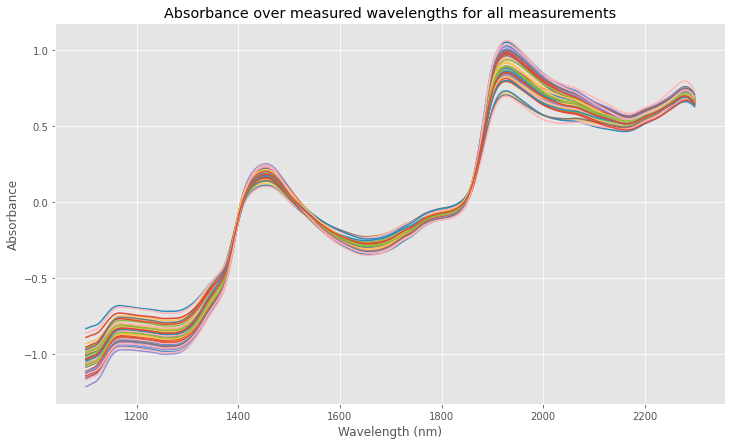

In [82]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

ax.plot(data_trans_wl)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance')
ax.set_title('Absorbance over measured wavelengths for all measurements')

plt.show()

Now, let's use the second derivative on data. We do that to enable better resolution between components, there is no baseline shift, there is better visibility of more nearow peaks, helps with scattering

In [97]:
#Second derivative of dataset with only wavelengths
X2 = savgol_filter(X,17, polyorder=2, deriv=2)

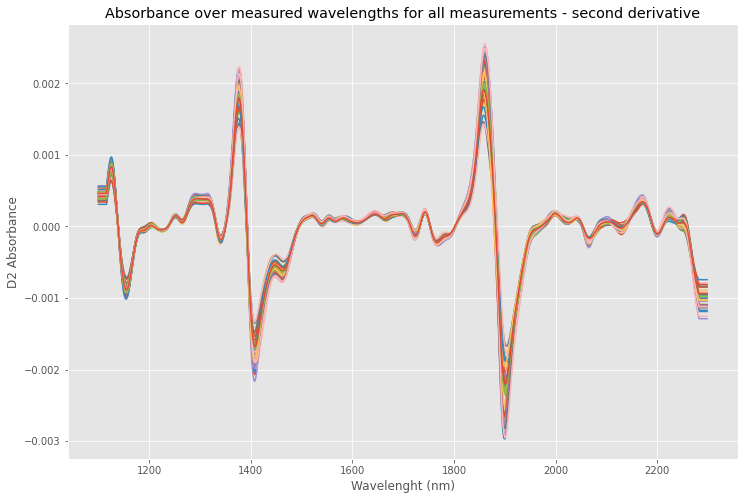

In [84]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(wl, X2.T)
ax.set_xlabel('Wavelenght (nm)')
ax.set_ylabel('D2 Absorbance')
ax.set_title('Absorbance over measured wavelengths for all measurements - second derivative')

plt.show()

In [85]:
def optimise_pls_csv(X, y, n_comp, plot_components=True):

#Run PLS including a cariable number of components and calculate MSE

  mse = []
  component = np.arange(1,n_comp)

  for i in component:
    pls = PLSRegression(n_components=i)

    #cross validation
    y_cv = cross_val_predict(pls, X, y, cv=10)
    mse.append(mean_squared_error(y,y_cv))

    
    comp = 100*(i+1)/40
    #Trick to update status on the same lline
    stdout.write('\r%d%% completed' % comp)
    stdout.flush()
  stdout.write('\n')  

  #Calculate and print the position of minimum in MSE
  msemin = np.argmin(mse)
  print('Suggested number of components: ', msemin+1)
  stdout.write('\n')  

  if plot_components is True:
    with plt.style.context(('ggplot')):
      plt.plot(component, np.array(mse), 'v', color='blue', mfc='blue')
      plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=15, mfc='red')
      plt.xlabel('Number of components')
      plt.ylabel('MSE')
      plt.title('PLS')
      plt.xlim(left=1)
    
    plt.show()

  #Define PLS object with optimal number of components
  pls_opt = PLSRegression(n_components=msemin+1)

  #Fit to the entire dataset
  pls_opt.fit(X, y)
  y_c = pls_opt.predict(X)

  #Cross_validation
  y_cv = cross_val_predict(pls_opt, X, y, cv=10)

  #Calculate scores for calibration and cross valiation
  score_c = r2_score(y, y_c)
  score_cv = r2_score(y, y_cv)

  #Calculate mean squared error for calibration and cross validation
  mse_c = mean_squared_error(y, y_c)
  mse_cv = mean_squared_error(y, y_cv)

  print('R2 calib: %5.3f' % score_c)
  print('R2 CV: %5.3f' % score_cv)
  print('MSE calib: %5.3f' % mse_c)
  print('MSE CV: %5.3f' % mse_cv)

  # Plot regression and figures of merit

  rangey = max(y) - min(y)
  rangex = max(y_c) - min(y_c)

  #Fit a line to the CV vs response
  z = np.polyfit(y, y_c, 1)
  with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9,5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y,c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')

    plt.show()

  return



100% completed
Suggested number of components:  7



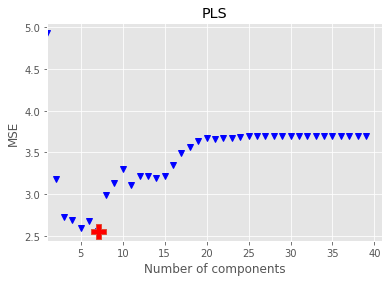

R2 calib: 0.859
R2 CV: 0.451
MSE calib: 0.657
MSE CV: 2.558


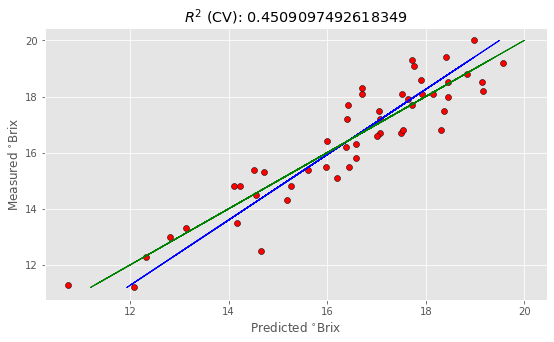

In [86]:
optimise_pls_csv(X2,y,40, plot_components=True)

In [87]:
pls = PLSRegression(n_components=3)

y_cv = cross_val_predict(pls, X2, y, cv=10)

In [88]:
y_cv_df = pd.DataFrame(y_cv)

In [89]:
y_df = pd.DataFrame(y)

In [90]:
pd.concat([y_cv_df, y_df], axis=1)

,0,0
0,15.184518,15.5
1,17.148446,16.7
2,15.262455,18.1
3,16.040541,14.8
4,15.799896,15.1
5,14.099764,19.3
6,16.913268,12.5
7,16.341850,17.7
8,18.605868,18.5
9,16.974221,18.3


##Variable selection method for PLS
https://nirpyresearch.com/variable-selection-method-pls-python/

The goal is to find out which wavelentghs to include in the model, to obtain the best quality. We need to get rid of wavelengths with increase noise, in order not to overfit. We will do this by discarding wavelengths with the lowest absolute value in regression coefficient.

In [116]:
#Make first and second derivative

X1 = savgol_filter(X, 11, polyorder = 2, deriv=1)
X2 = savgol_filter(X, 13, polyorder = 2,deriv=2)

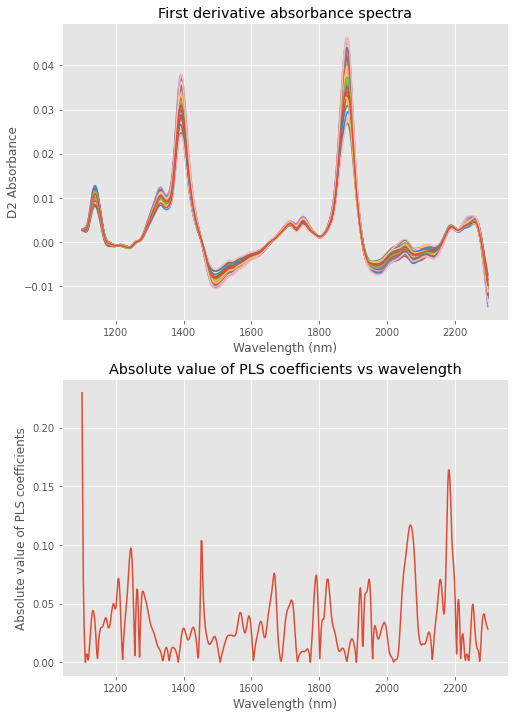

In [119]:
# First derivative
#Check the relationship between coefficient value and Absorbance at the same wavelength.
# We want to discard wavelengths with coefficients with values close to zero

#define the PLS regression object
pls = PLSRegression(n_components=8)
#Fit data
pls.fit(X1, y)

plt.figure(figsize=(8,12))
with plt.style.context(('ggplot')):
  ax1 = plt.subplot(211)
  ax1.plot(wl, X1.T)
  ax1.set_xlabel('Wavelength (nm)')
  ax1.set_ylabel('D2 Absorbance')
  ax1.set_title('First derivative absorbance spectra')

  ax2 = plt.subplot(212, sharex=ax1)
  ax2.plot(wl, np.abs(pls.coef_[:,0]))
  ax2.set_xlabel('Wavelength (nm)')
  ax2.set_ylabel('Absolute value of PLS coefficients')
  ax2.set_title('Absolute value of PLS coefficients vs wavelength')

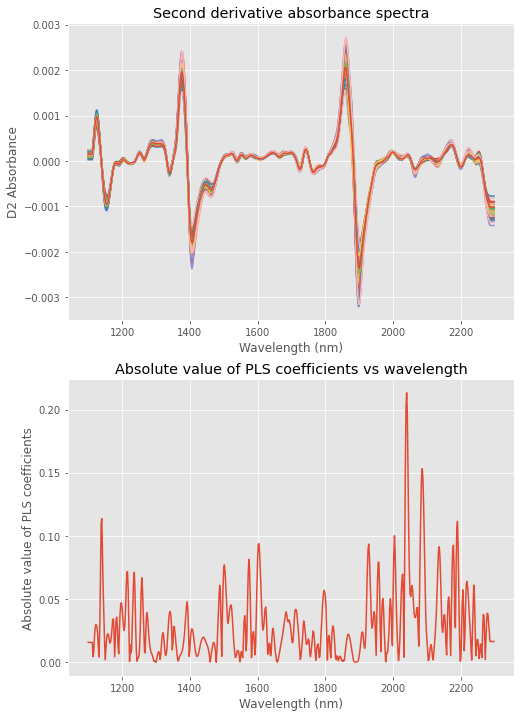

In [120]:
#Second derivative
#Check the relationship between coefficient value and Absorbance at the same wavelength
# We want to discard wavelengths with coefficients with values close to zero

#define the PLS regression object
pls = PLSRegression(n_components=8)
#Fit data
pls.fit(X2, y)

plt.figure(figsize=(8,12))
with plt.style.context(('ggplot')):
  ax1 = plt.subplot(211)
  ax1.plot(wl, X2.T)
  ax1.set_xlabel('Wavelength (nm)')
  ax1.set_ylabel('D2 Absorbance')
  ax1.set_title('Second derivative absorbance spectra')

  ax2 = plt.subplot(212, sharex=ax1)
  ax2.plot(wl, np.abs(pls.coef_[:,0]))
  ax2.set_xlabel('Wavelength (nm)')
  ax2.set_ylabel('Absolute value of PLS coefficients')
  ax2.set_title('Absolute value of PLS coefficients vs wavelength')

We will be discarding one wavelength at a time starting with the wavelnegth with the smalles absolute coefficient value. For each discarding process we will calculate MSE to find the MSE minimum. In that way we will discard the optimum number of wavelengths. First, we need to sort wavelengths according to coefficient value. We will sort in ascending way.

In [129]:
#Get the list of indices that sorts the PLS coffecients in ascending order of the absolute value
sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
Xc = X2[:,sorted_ind]

In [130]:
sorted_ind

array([100, 189, 279, 393, 180, 396, 395, 394, 397, 224, 439,  61, 398,
        97, 375, 392,  72, 377, 549,  98, 133,  99, 278, 369, 502, 458,
       374, 280, 336, 378, 566, 353, 376, 509,  25, 101, 366, 370, 313,
       586, 106, 399, 550, 503, 132,  96, 391, 577,  73, 134, 373, 358,
        74, 228, 581, 281, 241, 341, 217, 466,  16, 365, 218,  39, 368,
       223, 181, 314,   7, 328, 179, 371, 197, 161, 508, 149, 135, 372,
       342,  95, 160, 277, 225, 269, 367, 440,  75, 572, 535, 102, 400,
       114, 227, 425, 162, 107, 529, 246, 136, 115, 379, 390, 159, 265,
        94, 282, 131,  45, 137, 219, 270, 510, 105, 459, 266,  63,  84,
       103, 163,   8, 188, 335, 327,  93, 578, 138, 441, 504, 178, 442,
       182, 104, 226, 432, 216,  83, 222, 501, 329, 276,  71, 337, 555,
       357, 220, 233, 221,  92, 158, 283, 401, 116,  26, 113, 389, 139,
       164, 124, 312,  64, 457, 573, 190, 150, 315, 580, 340, 565, 408,
       177, 380, 507, 183,  15, 438, 130, 505, 364, 576, 187,  4

In [131]:
#Example of coefficient value (second smallest value)
np.abs(pls.coef_[:,0])[357]

0.009200801898253943

In [132]:
##Example of coefficient value (largest value)
np.abs(pls.coef_[:,0])[470]

0.21329950408595424

We will write an optimization function. We will optimize for the number of components at the same time as for the number of wavelengths. We loop first for every number of components with discarding a wavelength. We will be discarding one wavelength at a time starting with the wavelnegth with the smalles absolute coefficient value. For each discarding process we will calculate MSE to find the MSE minimum. In that way we will discard the optimum number of wavelengths.
In the end we will get matrix with MSE numbers for each combination of component number and wavelength. We are able to find MSE optimum.

In [133]:
X.shape[1]

600

In [140]:
def pls_variable_selection(X, y, max_comp):

  #Define MSE array to be populated
  mse=np.zeros((max_comp, X.shape[1]))

  # Loop over the number of PLS components
  for i in range(max_comp):

    #Regresion with specified number of components, using full spectrum
    pls1 = PLSRegression(n_components=i+1)
    pls1.fit(X, y)

    #Indices of sort spectra according to ascending absoulute value of PLS coefficeint
    sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))

    #Sort spectra accordingly
    Xc = X[:,sorted_ind]

    #Discard one wavelength at a tme of the sorted spectra,
    #Regress, and calculate the MSE cross-validation
    # Number of wavelneghts (factors) need to be at least the same as the number of components
    for j in range(Xc.shape[1]-(i+1)):
      pls2 = PLSRegression(n_components=i+1)
      #We filter with slicing out the wavelengths
      pls2.fit(Xc[:,j:], y)

      #We predict y_cv - predicted value
      y_cv = cross_val_predict(pls2, Xc[:,j:], y, cv=5)
      #We calculate mse (we use actual vs. predicted value)
      mse[i, j] = mean_squared_error(y, y_cv)

    comp = 100*(i+1)/(max_comp)
    stdout.write('\r%d%% completed' % comp)
    stdout.flush()
  stdout.write('\n')

  #Calculate and print the position of minimum in MSE
  mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

  print('Optimised number of components: ', mseminx[0]+1)
  print('Wavelengths to be discared', mseminy[0])
  print('Optimised MSEP ', mse[mseminx,mseminy][0])
  stdout.write('\n')

  #plt.imshow(mse, interpolation=None)
  #plt.show()

  #Calculate PLS with optimal components and export values
  pls = PLSRegression(n_components=mseminx[0]+1)
  pls.fit(X, y)

  sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))

  Xc=X[:,sorted_ind]

#Return:
#1. data matrix
#2. Number of components
#3. Number of discarded wavelengths
#wlč4. Sorted wavelengths
  return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)



In [149]:
#Do PLS without discarding wavelentghs in order to compare results with when discarding

def simple_pls_cv(X, y, n_comp):

  #Run PLS with suggested number of components
  pls = PLSRegression(n_components=n_comp)
  pls.fit(X,y)
  y_c = pls.predict(X)

  #Cross-validation
  y_cv = cross_val_predict(pls, X, y, cv=10)

  #Calculate scores for calibration and cross-validation
  score_c = r2_score(y, y_c)
  score_cv = r2_score(y, y_cv)

  #Calculate mean squared error for calibration and cross validation
  mse_c = mean_squared_error(y, y_c)
  mse_cv = mean_squared_error(y, y_cv)

  print('R2 calib: %5.3f' % score_c)
  print('R2 CV: %5.3f' % score_cv)
  print('MSE calib: %5.3f' % mse_c)
  print('MSE CV: %5.3f' % mse_cv)

  #Plot regression

  z = np.polyfit(y, y_cv, 1)
  with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9,5))
    ax.scatter(y_cv, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (Cv): '+str(score_cv))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')

    plt.show()

R2 calib: 0.778
R2 CV: 0.438
MSE calib: 1.035
MSE CV: 2.618


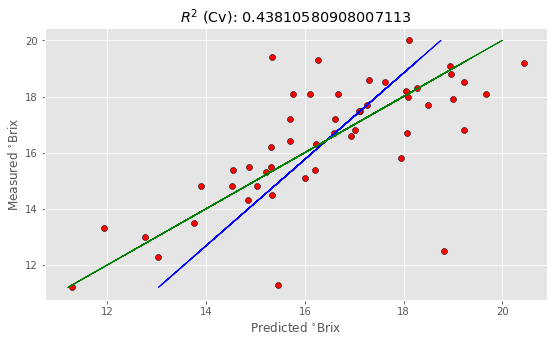

In [150]:
simple_pls_cv(X1,y,8)

Optimization process, running with:
1. X = not derived data
2. X1 = first derivative
3. X2 = second derivative

The best result is with the second derivative

100% completed
Optimised number of components:  15
Wavelengths to be discared 448
Optimised MSEP  1.7765343323189002

R2 calib: 0.898
R2 CV: 0.637
MSE calib: 0.477
MSE CV: 1.693


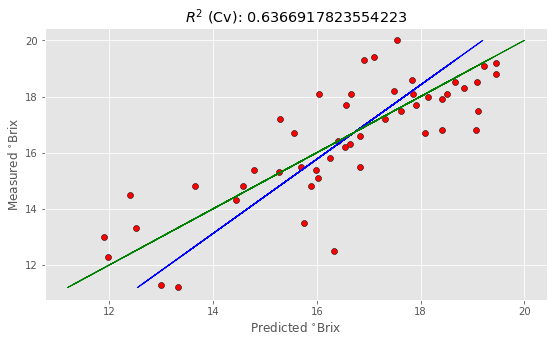

In [151]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed
Optimised number of components:  10
Wavelengths to be discared 417
Optimised MSEP  1.9073192879570635

R2 calib: 0.850
R2 CV: 0.590
MSE calib: 0.698
MSE CV: 1.910


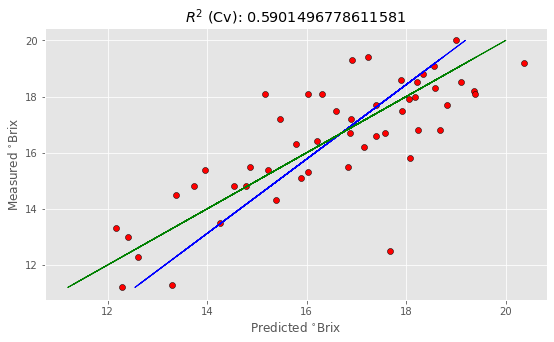

In [152]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X1, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed
Optimised number of components:  12
Wavelengths to be discared 503
Optimised MSEP  1.3846833128222187

R2 calib: 0.980
R2 CV: 0.708
MSE calib: 0.095
MSE CV: 1.361


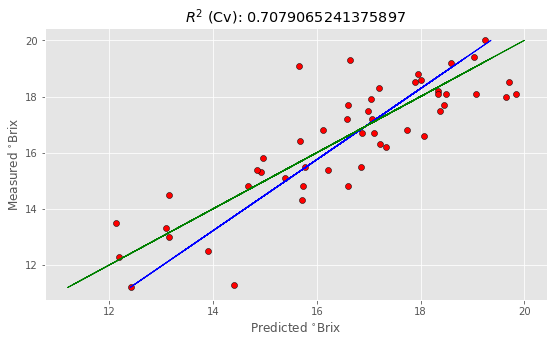

In [153]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X2, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

Graphicaly present which wavelengths have been discarded. Do that for not derivet data, first and second derivative.

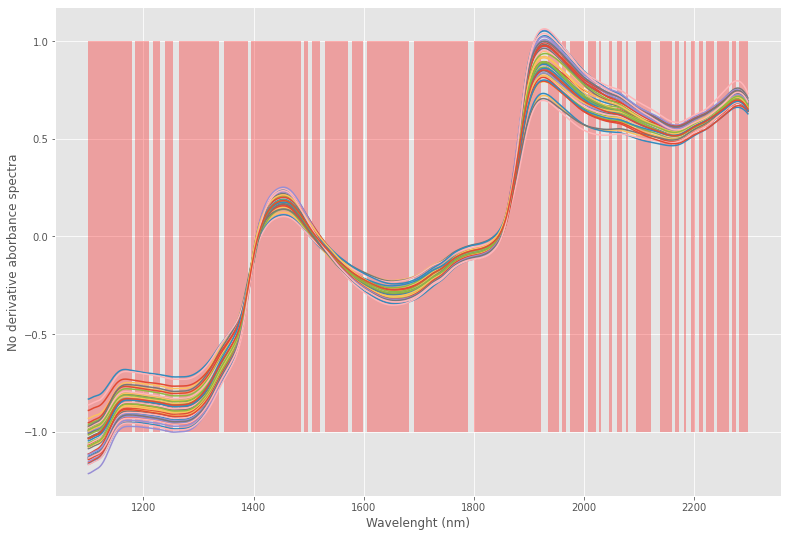

In [154]:
#No derivative

#Get a boolean array according to the indices that are being discared
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])

import matplotlib.collections as collections

#Plot spectra with supermpose selected bands
fig, ax = plt.subplots(figsize=(13,9))
with plt.style.context(('ggplot')):
  ax.plot(wl, X.T)
  plt.ylabel('No derivative aborbance spectra')
  plt.xlabel('Wavelenght (nm)')

collection = collections.BrokenBarHCollection.span_where(
    wl, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)

plt.show()

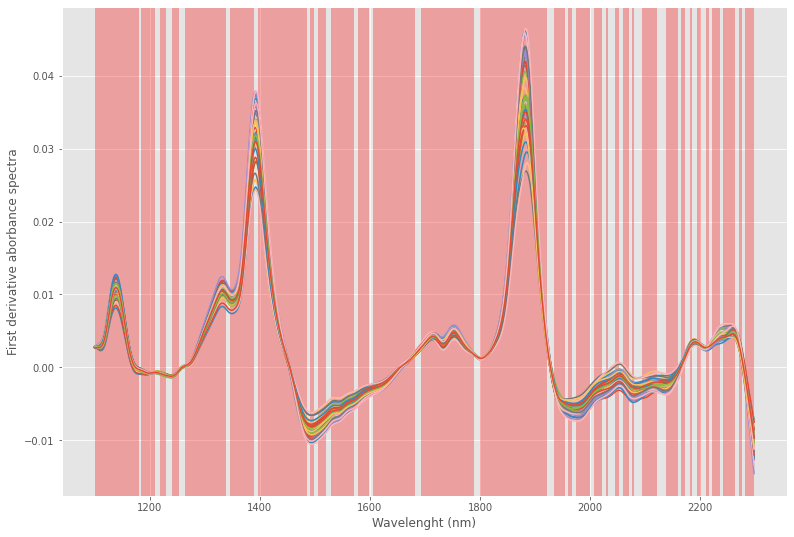

In [155]:
#First derivative

#Get a boolean array according to the indices that are being discared
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])

import matplotlib.collections as collections

#Plot spectra with supermpose selected bands
fig, ax = plt.subplots(figsize=(13,9))
with plt.style.context(('ggplot')):
  ax.plot(wl, X1.T)
  plt.ylabel('First derivative aborbance spectra')
  plt.xlabel('Wavelenght (nm)')

collection = collections.BrokenBarHCollection.span_where(
    wl, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)

plt.show()

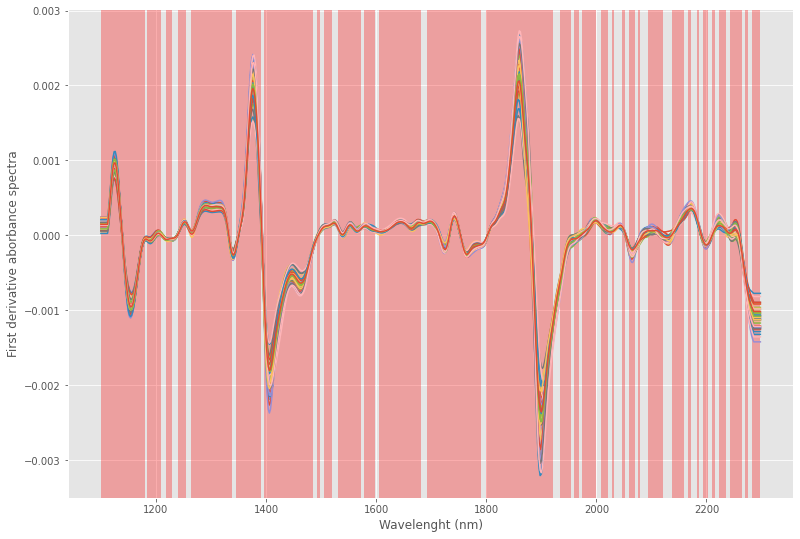

In [156]:
#Second derivative

#Get a boolean array according to the indices that are being discared
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])

import matplotlib.collections as collections

#Plot spectra with supermpose selected bands
fig, ax = plt.subplots(figsize=(13,9))
with plt.style.context(('ggplot')):
  ax.plot(wl, X2.T)
  plt.ylabel('First derivative aborbance spectra')
  plt.xlabel('Wavelenght (nm)')

collection = collections.BrokenBarHCollection.span_where(
    wl, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)

plt.show()

There is no large difference between different derivatives. We can see that the highest peaks were discarded, which belong to water. . Therefore we discarded wavelengths which reflected on noise (water) and not on our response.

We therefore successfuly optimized our model by selecting the most important wavelnegths